In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pyarrow import parquet as pq
import dask.dataframe as dd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Colab Notebooks/'

/content/drive/MyDrive/Colab Notebooks


In [4]:
# Load the dataset
df = dd.read_csv('car_prices.csv')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mileage),color,interior,seller,mmr,sellingprice,saledate
npartitions=1,,,,,,,,,,,,,,,,
,int64,string,string,string,string,string,string,string,float64,int64,string,string,string,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
! pip install 'fsspec>=0.3.3'

In [6]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

In [7]:
! pip install requests
! pip install aiohttp

In [8]:
import numpy as np

In [ ]:
# Cleaning the Dataset
# This might include dropping duplicates, handling missing values, etc.
df = df.drop_duplicates()
df = df.dropna() # Or other methods to handle missing values
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mileage),color,interior,seller,mmr,sellingprice,saledate
npartitions=1,,,,,,,,,,,,,,,,
,int64,string,string,string,string,string,string,string,float64,int64,string,string,string,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
import dask.dataframe as dd

# Load CSV using Dask, specifying the dtype for "odometer (mileage)"
df = dd.read_csv('car_prices.csv', dtype={'odometer (mileage)': 'float64'})

# If using Parquet, ensure consistent string encoding (e.g., UTF-8) during data loading/saving
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mileage),color,interior,seller,mmr,sellingprice,saledate
npartitions=1,,,,,,,,,,,,,,,,
,int64,string,string,string,string,string,string,string,float64,float64,string,string,string,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


1. Cleaning and Transforming DataFrames

In [14]:
# Compute the dataframe
#Implicitly set the datatypes when reading the csv files#
df = df.compute()

In [15]:
#Check the shape of data
print("Shape of the dataset:", df.shape[0], "rows and", len(df.columns), "columns")

Shape of the dataset: 558837 rows and 16 columns


In [ ]:
# Assuming 'df' is your DataFrame after loading your dataset
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

year                      0
make                  10301
model                 10399
trim                  10651
body                  13195
transmission          65357
vin                       0
state                     0
condition             11794
odometer (mileage)       94
color                   749
interior                749
seller                    0
mmr                       0
sellingprice              0
saledate                  0
dtype: int64


In [ ]:
# Filter to only show columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

make                  10301
model                 10399
trim                  10651
body                  13195
transmission          65357
condition             11794
odometer (mileage)       94
color                   749
interior                749
dtype: int64


In [10]:
# For categorical columns
df['make'] = df['make'].fillna(df['make'].mode()[0])
missing_values_column_after = df['make'].isnull().sum()
print(f"Missing values in 'make' after filling: {missing_values_column_after}")


Missing values in 'make' after filling: dd.Scalar<series-..., dtype=int64>


In [11]:
df['transmission'] = df['transmission'].fillna('most_common_transmission')
missing_values_column_after = df['transmission'].isnull().sum()
print(f"Missing values in 'transmission' after filling: {missing_values_column_after}")


Missing values in 'transmission' after filling: dd.Scalar<series-..., dtype=int64>


In [16]:
df['odometer (mileage)'] = df['odometer (mileage)'].interpolate(method='linear')
missing_values_column_after = df['odometer (mileage)'].isnull().sum()
print(f"Missing values in 'odometer (mileage)' after filling: {missing_values_column_after}")

Missing values in 'odometer (mileage)' after filling: 0


In [ ]:
# This will create a new DataFrame without any columns that have missing values
df_no_missing_values = df.loc[:, df.isnull().sum() == 0]
# This will give you a list of columns that don't have any missing values
columns_without_missing_values = df.columns[df.isnull().sum() == 0]
print(columns_without_missing_values)


Index(['year', 'make', 'transmission', 'vin', 'state', 'odometer (mileage)',
       'seller', 'mmr', 'sellingprice', 'saledate'],
      dtype='object')


In [ ]:
# Filter to only show columns with missing values
# Check for missing values
missing_values1 = df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
print(missing_values1)

model        10399
trim         10651
body         13195
condition    11794
color          749
interior       749
dtype: int64


In [17]:
# Feature Engineering
# Before converting the 'saledate' column to datetime, let's remove the timezone information since it's not consistent (PST and PDT)
df['saledate'] = df['saledate'].str.replace(r" GMT-0800 \(PST\)", "", regex=True)
print(df['saledate'].head(5))

0    Tue Dec 16 2014 12:30:00
1    Tue Dec 16 2014 12:30:00
2    Thu Jan 15 2015 04:30:00
3    Thu Jan 29 2015 04:30:00
4    Thu Dec 18 2014 12:30:00
Name: saledate, dtype: string


In [18]:
# Check the length of the DataFrame
print("Length of the DataFrame:", len(df))
# Assuming you have a Series or list you're trying to assign to 'saledate'
saledate_values = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S', errors='coerce')
print(df['saledate'].head(5))

Length of the DataFrame: 558837
0    Tue Dec 16 2014 12:30:00
1    Tue Dec 16 2014 12:30:00
2    Thu Jan 15 2015 04:30:00
3    Thu Jan 29 2015 04:30:00
4    Thu Dec 18 2014 12:30:00
Name: saledate, dtype: string


In [19]:
# Check the initial data type and the format of the first few entries
print("Data type before conversion:", df['saledate'].dtype)
print(df['saledate'].head())

# If the 'saledate' column is not of string type, convert it to string
if df['saledate'].dtype != 'object':  # 'object' typically means string in pandas DataFrame
    df['saledate'] = df['saledate'].astype(str)

# Apply regex replacement to remove the timezone information
df['saledate'] = df['saledate'].str.replace(r" GMT-[0-9]{4} \(.*\)", "", regex=True)
# Attempt to convert 'saledate' to datetime format without coercing errors
df['saledate'] = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S', errors='raise')
# Now extract the year, month, and day of the week
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_day'] = df['saledate'].dt.dayofweek

# Print the first 5 entries after conversion
print(df['saledate'].head())

Data type before conversion: string
0    Tue Dec 16 2014 12:30:00
1    Tue Dec 16 2014 12:30:00
2    Thu Jan 15 2015 04:30:00
3    Thu Jan 29 2015 04:30:00
4    Thu Dec 18 2014 12:30:00
Name: saledate, dtype: string
0   2014-12-16 12:30:00
1   2014-12-16 12:30:00
2   2015-01-15 04:30:00
3   2015-01-29 04:30:00
4   2014-12-18 12:30:00
Name: saledate, dtype: datetime64[ns]


In [20]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,year,condition,odometer (mileage),mmr,sellingprice,sale_year,sale_month,sale_day
0,2015,5.0,16639.0,20500,21500,2014,12,1
1,2015,5.0,9393.0,20800,21500,2014,12,1
2,2014,4.5,1331.0,31900,30000,2015,1,3
3,2015,4.1,14282.0,27500,27750,2015,1,3
4,2014,4.3,2641.0,66000,67000,2014,12,3
...,...,...,...,...,...,...,...,...
558832,2015,4.5,18255.0,35300,33000,2015,7,3
558833,2012,5.0,54393.0,30200,30800,2015,7,2
558834,2012,4.8,50561.0,29800,34000,2015,7,2
558835,2015,3.8,16658.0,15100,11100,2015,7,3


In [21]:
# Compute correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,condition,odometer (mileage),mmr,sellingprice,sale_year,sale_month,sale_day
year,1.000000,0.551232,-0.772748,0.596601,0.586459,0.114314,-0.046689,0.045325
condition,0.551232,1.000000,-0.538842,0.485026,0.538774,0.035861,-0.014469,0.059668
odometer (mileage),-0.772748,-0.538842,1.000000,-0.588149,-0.582436,-0.086819,0.041047,-0.071553
mmr,0.596601,0.485026,-0.588149,1.000000,0.983632,0.073239,-0.024576,0.083330
sellingprice,0.586459,0.538774,-0.582436,0.983632,1.000000,0.076982,-0.029430,0.084354
sale_year,0.114314,0.035861,-0.086819,0.073239,0.076982,1.000000,-0.823229,0.031289
sale_month,-0.046689,-0.014469,0.041047,-0.024576,-0.029430,-0.823229,1.000000,-0.008213
sale_day,0.045325,0.059668,-0.071553,0.083330,0.084354,0.031289,-0.008213,1.000000


In [ ]:
# Identify 2-3 different correlations
correlations = correlation_matrix['sellingprice'].sort_values(ascending=False)
correlations

sellingprice          1.000000
mmr                   0.983632
year                  0.586459
condition             0.538774
sale_day              0.084354
sale_year             0.076982
sale_month           -0.029430
odometer (mileage)   -0.582436
Name: sellingprice, dtype: float64

In [ ]:
# Correlations
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Now compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation with 'sellingprice', sorted descending
print(correlation_matrix[['sellingprice']].sort_values(by='sellingprice', ascending=False))

                    sellingprice
sellingprice            1.000000
mmr                     0.983632
year                    0.586459
condition               0.538774
sale_day                0.084354
sale_year               0.076982
sale_month             -0.029430
odometer (mileage)     -0.582436


**Feature Engineering for Hypotheses**

In [22]:
import pandas as pd
# Hypothesis 1: Fuel Efficiency vs. Price
# For Hypothesis 2: define a list of luxury brands for comparison.
# Assuming df is your DataFrame
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus']  # Add or remove brands as needed.
# Adjusting the lambda function to explicitly handle NA values
df['is_luxury'] = df['make'].apply(lambda x: 'Luxury' if not pd.isna(x) and x in luxury_brands else 'Non-Luxury')

In [23]:
# For Hypothesis 3, derive car age from the model year
current_year = pd.Timestamp.now().year
df['car_age'] = current_year - df['year']

**Visualization and Analysis**
Hypothesis 1: Fuel Efficiency vs. Price

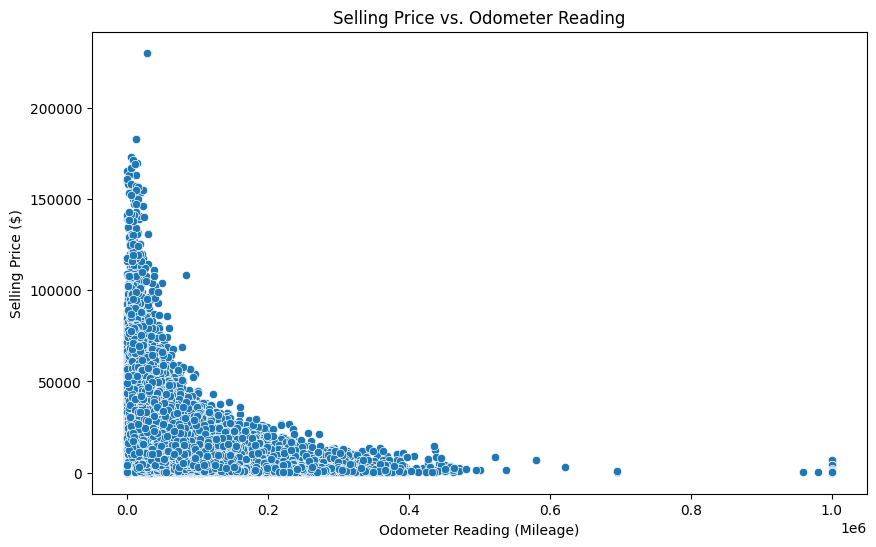

Correlation coefficient between odometer reading and selling price: -0.58243607658479


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between odometer reading and selling price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer (mileage)', y='sellingprice', data=df)
plt.title('Selling Price vs. Odometer Reading')
plt.xlabel('Odometer Reading (Mileage)')
plt.ylabel('Selling Price ($)')
plt.show()
# Calculating correlation coefficient
correlation_coefficient = df['odometer (mileage)'].corr(df['sellingprice'])
print(f"Correlation coefficient between odometer reading and selling price: {correlation_coefficient}")

**Hypothesis 2:** Luxury vs. Non-Luxury Brand Prices

**Hypothesis 3:** Car Age vs. Price

In [ ]:
# Export Final Dataset as Parquet and CSV
df.to_csv('cleaned_data.csv', index=False)
df.to_parquet('cleaned_data.parquet')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
import numpy as np
import pandas as pd

In [25]:
# Now, let's define our features and labels
key_features = ['state', 'condition', 'odometer (mileage)', 'seller', 'mmr', 'sale_year', 'sale_month', 'sale_day']
X = df[key_features]  # This should be your DataFrame with the specified columns
y = df['sellingprice']
# Generate a random regression problem
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 10)
y_train shape: (800,)
X_test shape: (200, 10)
y_test shape: (200,)


In [26]:
# Initialize regression models
models = {
    'Linear Regression': LinearRegression()
}
# Dictionary to store evaluation results
results = {}
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results in the dictionary
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, R2: {metrics['R2']}")


Linear Regression - MAE: 0.07773328130097608, MSE: 0.009511914910418967, R2: 0.9999994362016347
